
(50000, 32, 32, 3)
(10000, 32, 32, 3)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense

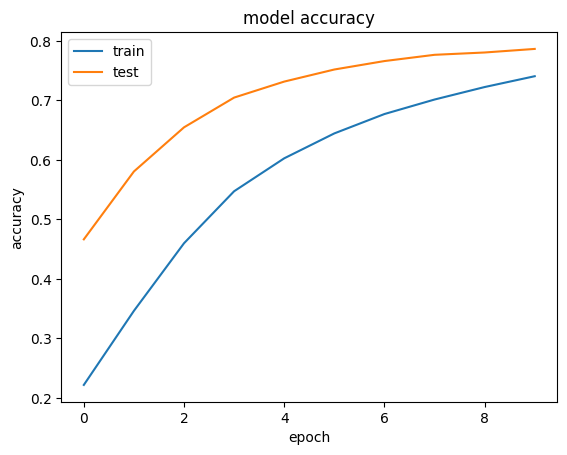

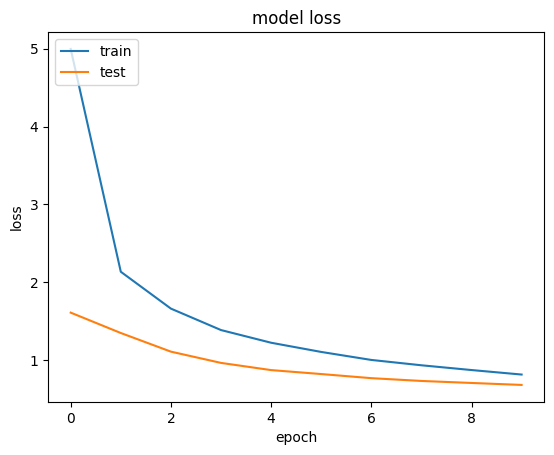

313/313 [==============================] - 42s 135ms/step - loss: 0.6845 - accuracy: 0.7867
Train Accuracy: 82.83%
Test Accuracy: 78.67%


In [1]:
#CIFAR10 ,models = VGG16
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

# بارگذاری داده‌ها
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape)
print(x_test.shape)

# تغییر اندازه تصاویر
x_train_resized = np.array([cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA) for img in x_train])
x_test_resized = np.array([cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA) for img in x_test])

# پیش پردازش ورودی‌ها برای VGG16
x_train_resized = preprocess_input(x_train_resized)
x_test_resized = preprocess_input(x_test_resized)

# بارگذاری مدل VGG16
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in vgg_conv.layers:
    layer.trainable = False

# ساخت مدل
model=keras.Sequential()
model.add(vgg_conv)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=64,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=10,activation='softmax'))

model.summary()
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# آموزش مدل
history = model.fit(x_train_resized, y_train, epochs=10, batch_size=128, validation_data=(x_test_resized, y_test))

# نمایش تاریخچه دقت و خطا
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###########################
### EVALUATION
##########################

train_loss, train_acc = model.evaluate(x_train_resized, y_train)
test_loss, test_acc = model.evaluate(x_test_resized, y_test)

print(f'Train Accuracy: {train_acc * 100:.2f}%')
print(f'Test Accuracy: {test_acc * 100:.2f}%')
